# Сборный проект

Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру.
Необходимо спланировать рекламные кампании на 2017 год.


**Цель исследования** — <u>выявить определяющие успешность игры закономерности и проверить 2 гипотезы:</u> <a id='hypothesis'></a>

1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. средние пользовательские рейтинги жанров Action и Sports разные.

**Ход исследования**

В вашем распоряжении исторические данные о продажах игр из открытых источников (оценки пользователей и экспертов, жанры и платформы) до 2016 г.

О качестве данных ничего не известно. Поэтому перед началом исследования понадобится обзор и предобработка данных, в случае, если в них будут обнаружены артефакты. Начнем с проверки данных на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки постараемся исправить самые критичные из них, также, при необходимости, проведем дополнительные рассчеты.

Остальная часть исследования будет посвящена самому анализу, составлению портретов пользователей по регионам, проверке гипотез и подведению итогов.
 
**Таким образом, исследование пройдёт в 6 основных этапов:**
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Портрет пользователя каждого региона.
 5. Проверка гипотез.
 6. Общий вывод.

## Обзор данных

Для начала импортируем библиотеки, которые понадобятся в нашей работе:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import statistics as stat

import requests as rq
from bs4 import BeautifulSoup

from tqdm import tqdm

In [2]:
pd.set_option('display.max_rows', None)

Загрузим файл, отобразим 10 строк и выведем основную информацию:

In [3]:
df = pd.read_csv('/datasets/games.csv')
display(df.head(10))
display(df.info())
display(df.describe())
print('Количество дубликатов:', df.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Количество дубликатов: 0


**Столбцы:**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

В датафрейме 11 столбцов и 16715 строк с информацией об играх и их продажах с 1980 по 2016 гг.
Используются 2 типа данных: float64, object.

**Мы выявили 3 ошибки в данных:**
1. несоответствие названий столбцов с хорошим стилем: необходимо привести к нижнему регистру;
2. неверные типы данных: нужно заменить тип `Year_of_Release` на int64, тип `User_Score` на float64;
3. пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`;

Предварительно можно утверждать, что данных достаточно для проведения исследования. Приступим к их предобработке.

## Предобработка данных

### Приведение названий столбцов к нижнему стилю и замена типа данных

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков и замены типов данных

Посмотрим на количество пропусков и их долю от всех данных:

In [5]:
display(df.isna().sum().sort_values())

na_columns = ['name', 'genre', 'year_of_release', 'user_score', 'rating', 'critic_score']
print('Доли пропусков в столбцах:')
print()

for col in na_columns:
    print(col, '—', round(((df[col].isna().sum() / len(df)) * 100), 2), '%')

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Доли пропусков в столбцах:

name — 0.01 %
genre — 0.01 %
year_of_release — 1.61 %
user_score — 40.09 %
rating — 40.48 %
critic_score — 51.32 %


#### Name и genre

Выведем строки с пропущенными названиями игр:

In [6]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбцах `name` и `genre` лежат в двух строках, что составляет менее одной десятой процента от всех данных. Восстановить утраченные значения мы не сможем, а их удаление не повлияет на результаты нашего исследования, поэтому смело удалим эти строки:

In [7]:
df = df.dropna(subset = ['name'])
df[['name','genre']].isna().sum()

name     0
genre    0
dtype: int64

Вероятно, природа этих пропусков - человеческий фактор: данные о продажах должны были подгрузиться и аккумулироваться с данными конкретной игры, выпущенной в 1993 г. на платформе GEN, но этого не произошло из-за того, что не было указано название игры, или была допущена ошибка.

#### Year_of_release

In [8]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В столбце `year_of_release` пропусков значительно больше - 1.61% от всех данных, просто удалить строки мы не можем. 

Иногда в названиях самих игр можно встретить даты релизов. При этом, если в названии встречается год - он не обязательно означает дату выпуска, как правило, это не распространяется на игры спортивных жанров. Например, игры "Madden NFL 2004" и "FIFA Soccer 2004" были выпущены в 2003 г.

Тем не менее, возможно, учитывая эти закономерности и используя фильтры, мы сможем заполнить значительную часть пропусков в рассматриваемом столбце. Посмотрим, какую долю пропусков составляют игры, в названиях которых встречается год:

In [9]:
print('Игры, в названиях которых встречается год, составляют {:.2%} от всех пропусков (всего {} строк).'\
      .format(len(df[df['name'].astype(str).str.contains('199*|200*|201*')]) / len(df['year_of_release'].isna()),\
              len(df[df['year_of_release'].isna()])))

Игры, в названиях которых встречается год, составляют 5.37% от всех пропусков (всего 269 строк).


Всего 5% от всех пропусков - усилия едва ли будут оправданы. Попробуем достать года релизов с помощью скрейпинга с сайта [mobygames.com](https://www.mobygames.com/), используя библиотеки `Beautifulsoup` и `Requests`: будем искать нужную ссылку с датой релиза по названию игры и платформы.

Для удобства выведем все платформы игр, в годе релиза которых встречаются пропуски:

In [10]:
df[df['year_of_release'].isna()]['platform'].sort_values().unique() 

array(['2600', '3DS', 'DS', 'GB', 'GBA', 'GC', 'N64', 'PC', 'PS', 'PS2',
       'PS3', 'PSP', 'PSV', 'Wii', 'X360', 'XB'], dtype=object)

Для начала попробуем достать дату релиза для игры "Madden NFL 2004" на PS2:

In [11]:
url = 'https://www.mobygames.com/game/ps2/madden-nfl-2004'
r = rq.get(url)
r.text

'<!DOCTYPE html>\n<html>\n<head>\n  <title>Madden NFL 2004 for PlayStation 2 (2003) - MobyGames</title>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <base target="_top">\n  <meta name="description" content="The long running Madden series returns for another series of NFL action on nearly every platform available in 2003.New to the series this year are, of course, every new player included in the rosters for the new season, along with every other defensive and attacking player from every team in the lea...">\n  <meta property="og:site_name" content="MobyGames" />\n  <meta property="og:type" content="website" />\n  <meta property="og:image" content="https://www.mobygames.com/images/covers/l/24094-madden-nfl-2004-playstation-2-front-cover.jpg" />\n  <meta property="og:title" content="Madden NFL 2004 for PlayStation 2 (2003) - MobyGames" />\n  <meta property="og:descr

In [12]:
soup = BeautifulSoup(r.text, 'lxml')
soup.find('div', class_ ='row').find('div', {"id" : "coreGameRelease"})\
.find('a', {'href': 'https://www.mobygames.com/game/ps2/madden-nfl-2004/release-info'}).text

'Aug 12, 2003'

Обратим внимание, что URL адрес сожержит в себе название игры и платформы, приведенные к нижнему регистру, с пробелами, замененными на символ "-". Проверив, другие игры на сайте, увидим, что в названиях игр и платформ в URL не содержатся и другие синтаксические знаки, в некоторых случаях отличаются аббревиатуры, в начале нет артикля "the" и т.д. 

Попробуем учесть по максимуму таких нюансов, чтобы найти путь к большему количеству страниц-источников с годом релиза:

In [13]:
# сохраним в переменно index_isna индексы строк с пропущенным годом релиза
index_isna = df[df['year_of_release'].isna()].index

# сохраним в переменную link_name названия игр в нижнем регистре
link_name = df[df['year_of_release'].isna()]['name'].str.lower()
df['name'] = df['name'].str.strip()

# напишем функцию replace_the_and_gap, которая удалит артикли the и пробелы, если они стоят в начале названия
def replace_the_and_gap(x):
    if x.startswith('the-'):
        x = x[4:]
    elif x.startswith('-'):
        x = x[1:]
    return(x)

# учитываем различия в названиях игр и платформ
link_name = link_name.str.replace(' - ', '-').str.replace(' ', '-')\
.str.replace('.','').str.replace("'", "").str.replace(":", "").str.replace("!", "")\
.str.replace('&','').str.replace(',','')

platform_link = df[df['year_of_release'].isna()]['platform'].str.lower().str.replace(' ', '-')\
.str.replace('.','').str.replace("'", "").str.replace(":", "").str.replace("!", "")\
.str.replace('&','').str.replace('x360','xbox360').str.replace('gba','gameboy-advance')\
.str.replace('gc','gamecube').str.replace('pc','windows').str.replace('2600','atari-2600')\
.str.replace('ds','nintendo-ds').str.replace('xb','xbox')

platform_link

/tmp/ipykernel_133/2954798986.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  link_name = link_name.str.replace(' - ', '-').str.replace(' ', '-')\
/tmp/ipykernel_133/2954798986.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  platform_link = df[df['year_of_release'].isna()]['platform'].str.lower().str.replace(' ', '-')\


183                  ps2
377                  ps2
456                  wii
475                  ps2
609           atari-2600
627            xboxox360
657      gameboy-advance
678                  wii
719                  wii
805                  wii
1131             windows
1142                 ps3
1301                  ps
1506          atari-2600
1538                 psp
1585          atari-2600
1609                 wii
1650                 ps2
1699                xbox
1840                 ps2
1984                  ps
2010                  gb
2106          atari-2600
2108                 ps2
2132           xboxox360
2157                 ps2
2169                 ps3
2273                 ps3
2281                xbox
2361                 wii
2453           xboxox360
2479                 psp
2492                 ps2
2522                 ps3
2536           xboxox360
2572                 psp
2773     gameboy-advance
2849                 wii
2969           xboxox360
3024     gameboy-advance


In [14]:
# подставим в URL адрес названия игр и платформ, где нужно заполнить пропуски в годах релизов

for i, name, platform in tqdm(zip(link_name.index, link_name, platform_link)): 
    
    name = replace_the_and_gap(name)
    
    url = f'https://www.mobygames.com/game/{platform}/{name}'
    r = rq.get(url)
    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'lxml')
                
        soup_find = soup.find('div', class_ ='row').find('div', {"id" : "coreGameRelease"})\
        .find('a', {'href': f'https://www.mobygames.com/game/{platform}/{name}/release-info'})
        if soup_find:
            df.loc[i, 'year_of_release'] = soup_find.text[-4:]
                    
# узнаем сколько пропусков не удалось обработать       

len(df[df['year_of_release'].isna()])

269it [03:05,  1.45it/s]


127

In [15]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
1984,Legacy of Kain: Soul Reaver,PS,NaN,Action,0.58,0.40,0.00,0.07,91.0,9,T
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.00,0.09,77.0,7.9,E10+
2157,Wheel of Fortune,PS2,NaN,Misc,0.47,0.36,0.00,0.12,NaN,tbd,E
2361,Rhythm Heaven,Wii,NaN,Misc,0.11,0.00,0.77,0.01,NaN,NaN,NaN
2453,The Lord of the Rings: War in the North,X360,NaN,Action,0.52,0.24,0.00,0.08,61.0,7.4,M


Таким образом, нам удалось заполнить 142 пропускa - значительная часть (чуть больше половины), но, к сожалению не все. Посмотрим, какю сейчас долю от всех данных составляют пропуски в столбце `year_of_release`:

In [16]:
print(round(((df['year_of_release'].isna().sum() / len(df)) * 100), 3), '%')

0.76 %


Избавиться от оставшейся части пропусков можно тремя способами: 
1. вручную, что слишком времязатратно;
2. медианными значениями по названию платформ, что может исказить результаты исследования;
3. удалить, так как они составляют менее 1% от всех данных.

Выберем третий способ:

In [17]:
df = df.dropna(subset = ['year_of_release'])
df[['year_of_release']].isna().sum()

year_of_release    0
dtype: int64

Теперь можем привести данные к нужному типу int64:

In [18]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df['year_of_release'].dtype

dtype('int64')

Пропуски в столбце `year_of_release`, могли произойти по тем же техническим причинам, что возникли у нас во время скрейпинга. Данные датафрейма могли парситься с одного, или даже нескольких сайтов, и не все пути к годам релизов были найдены, например, из того, что названия игр и платформ не всегда совпадают в разных источниках.

#### Critic_Score, user_score и  rating

Для начала разберемся с аббревиатурой `tbd` в `user_score`, согласно [источнику](https://autogear.ru/article/171/345/tbd---chto-znachit-eto-sokraschenie/), в геймерской сфере она означает "to be determined" - "будет определено". 

Предположим, что большинство значений "tbd" встречаются у игр, выпущенных за последние годы, непосредственно перед выгрузкой данных, так как отзывов у таких игр еще недостаточное количество. 

Посмотрим на распределение значений "tbd" по годам релизов игр:

Text(0, 0.5, 'Quantity')

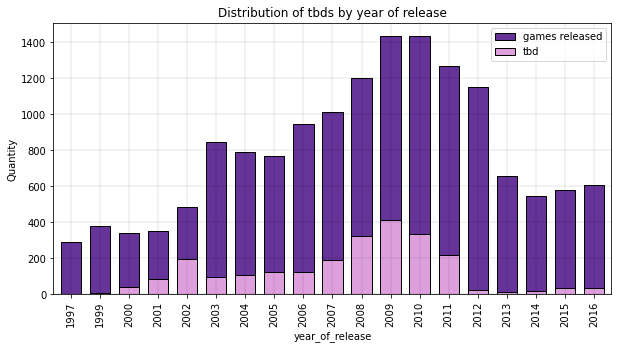

In [19]:
plt.figure(figsize=(10,5))
ax = plt.gca()

# построим график с общим количеством выпущенных игр

games_released_since_1997 = df.query('year_of_release > 1996').groupby('year_of_release')['name'].count().reset_index()
games_released_since_1997.plot(x = 'year_of_release', y = 'name', kind ='bar', color = 'rebeccapurple', 
             edgecolor ='black', width=0.7, ax=ax, label = 'games released')

# в той же оси построим график с количеством tbd-значений

tbd_by_years_of_release = df.query('user_score == "tbd"').groupby('year_of_release')['name'].count().reset_index()
tbd_by_years_of_release.plot(x = 'year_of_release', y = 'name',
                                  kind ='bar', color = 'plum', edgecolor ='black', 
                                  width=0.7, ax=ax, label = 'tbd') 

plt.title('Distribution of tbds by year of release')
plt.grid(linestyle='-', linewidth='0.1', color='black')
plt.ylabel('Quantity')

На графике видно, что количество игр, чья пользовательская оценка еще не определена, слабо коррелирует с общим количеством выпущенных игр. Однако это не свойственно играм, выпущенным начиная с 2012 г., у которых значение "tbd" практически не встречается. Из этого можем сделать вывод, что наше предположение не верно, так как данные актуальны на текущий момент (декабрь 2016 г.).

Вероятно, на количество неопределенных оценок влияет целый ряд факторов: количество выпущенных игр, их популярность, активность аудитории в выставлении оценок на определенном, скорее всего, англоязычном ресурсе, с которого были выгружены оценки и т.д.

Можно предположить, что в года пиковых продаж вышло так много игр, что многие из них остались незамеченными, так и не смогли набрать минимум оценок для выставления рейтинга.

В любом случае неопределенная оценка говорит нам о том, что ее нет, поэтому логично заменить значения "tbd" на "NaN":

In [20]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float64')
df['user_score'].dtype

dtype('float64')

Посмотрим на общее количество пропусков в столбцах `critic_score`, `user_score`, `rating`:

In [21]:
df[['critic_score', 'user_score', 'rating']].isna().sum()

critic_score    8504
user_score      9039
rating          6703
dtype: int64

Теперь взглянем на их распределение по годам :

3it [00:00, 29.39it/s]


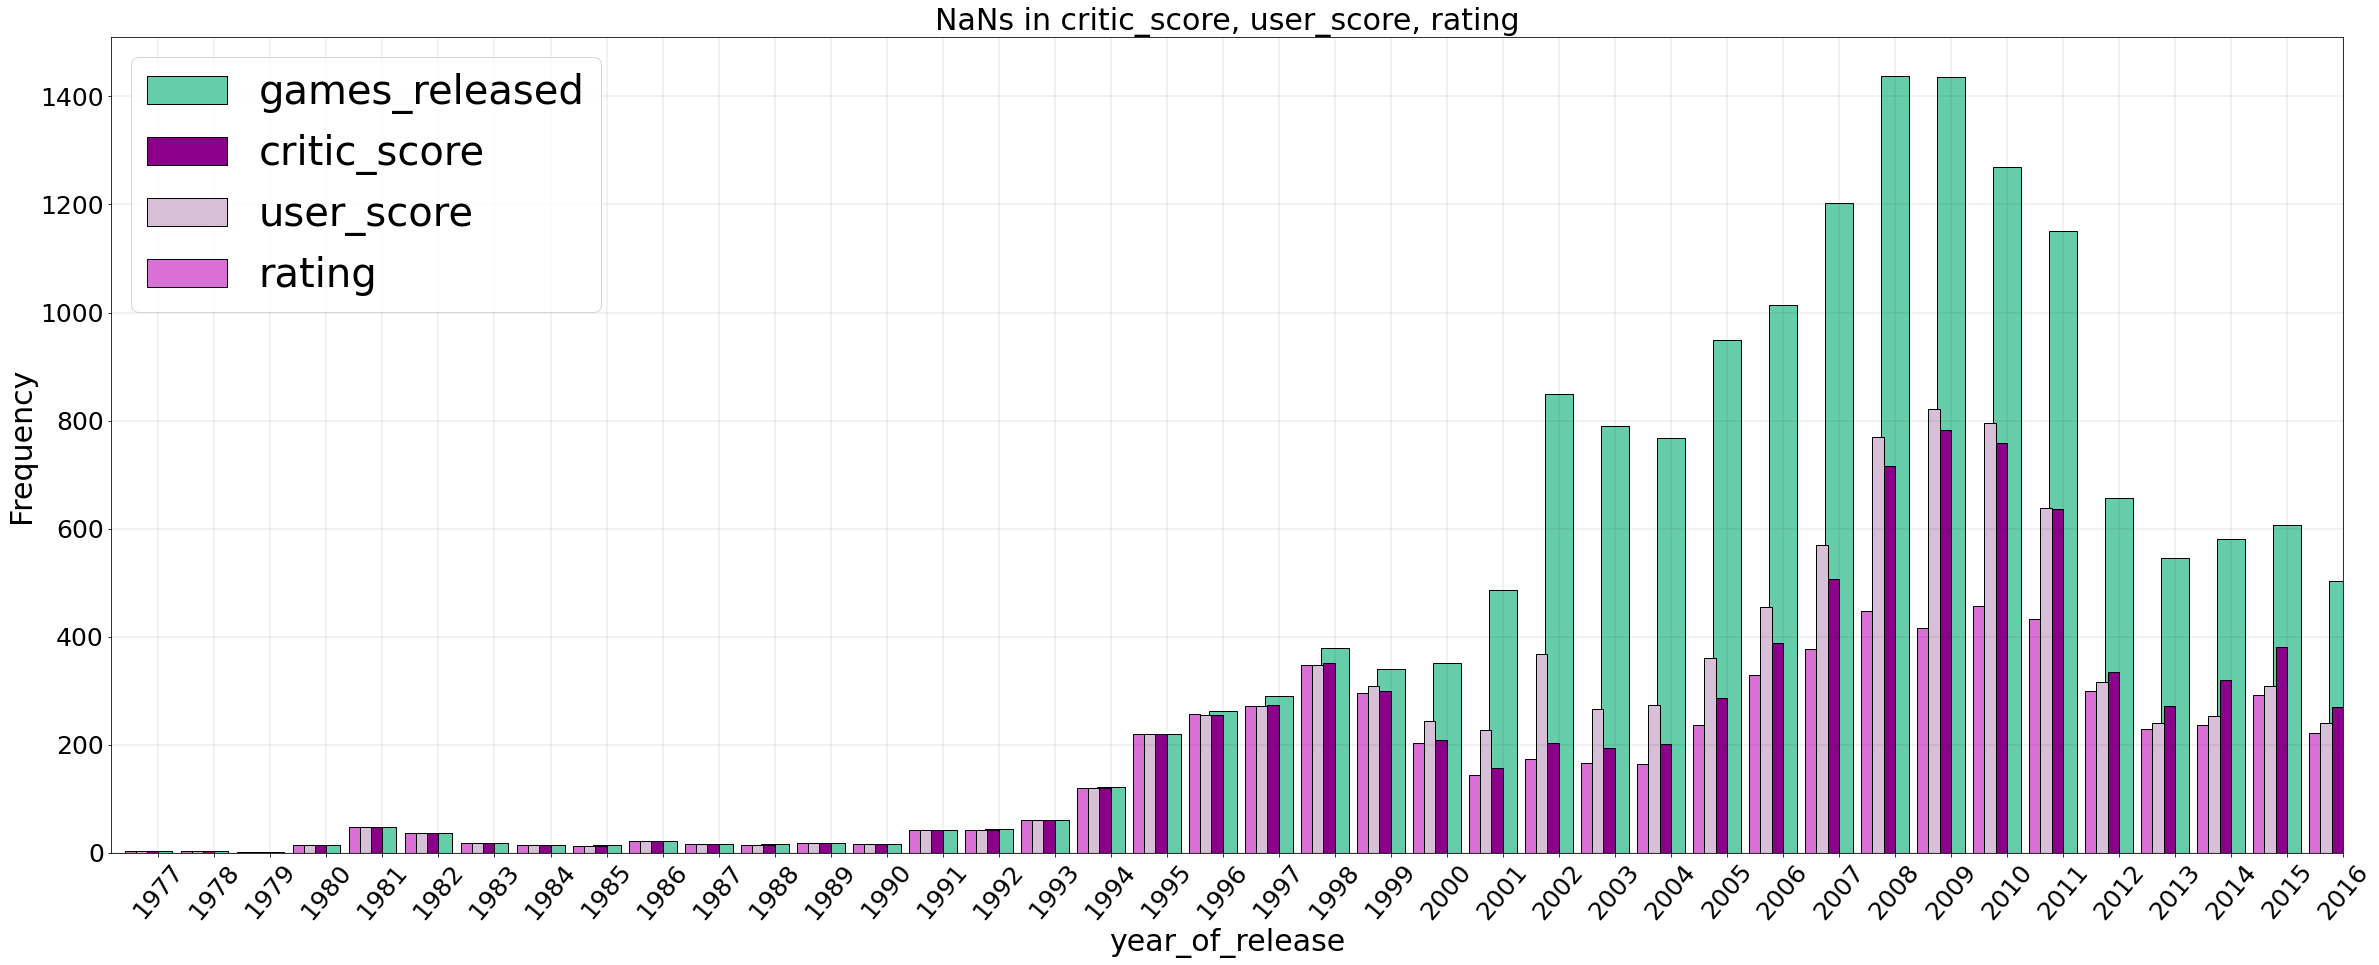

In [22]:
# создадим списки цветов и столбцов

list_of_colors = ['darkmagenta', 'thistle', 'orchid']
list_of_parameters = ['critic_score', 'user_score', 'rating'] 

# создадим пустой список для создания легенды графика

legend_list = ['games_released']

plt.figure(figsize=(40,15))

# построим график с релизами всех игр

all_games_released = df.groupby('year_of_release')['name'].count()
all_games_released.plot(y = 'count', x = 'year_of_release', kind ='bar', color = 'mediumaquamarine', edgecolor ='black')

# построим графики пропусков в заданных столбцах

ax = plt.gca()

for i, color, position in tqdm(zip(list_of_parameters, list_of_colors, [1,2,3])): 

    grouped_df = df[df[i].isna()].groupby('year_of_release')['name'].count().reset_index()

    grouped_df.plot(x = 'year_of_release', y = 'name', kind ='bar', ax=ax, color = color, 
                           position=position, edgecolor ='black', width=0.2) 

    legend_list.append(i)


plt.xticks(rotation=50)    

ax.legend(legend_list, fontsize = 40)
plt.title('NaNs in critic_score, user_score, rating', fontsize = 30)
plt.xlabel('year_of_release', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)

plt.grid(linestyle='-', linewidth='0.1', color='black')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(25)


plt.show()   

На графике видно, что игры начинают оценивать с 1996 г., скорее всего, тогда и начали появляться ресурсы, на которых пользователи могут оставить оценку.

Кажется, что в большинстве случаях мы наблюдаем пропуски в оценках и рейтинге у одних и тех же игр, посмотрим, сколько таких кейсов:

In [23]:
len(df.query('critic_score.isna() & user_score.isna() & rating.isna()'))

6606

Действительно, большинство: практически у всех игр без рейтинга пропущены также значения и в оценках. Можем предположить, что на ресурсе, с которого выгружались оценки и рейтинг, опубликованы данные не по всем играм из нашего датафрейма, что и является основной причиной пропусков.

Избавиться от этих значений, удалив строки, мы не можем, так как потеряем значительную часть данных, а если заменим, например, на нули - исказим результаты дальнейшего исследования, поэтому оставим их.

### Дополнительные рассчеты

#### Суммарные продажи во всех регионах

Добавим столбец `total_sales`, отражающий продажи игр по всем регионам:

In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Рейтинг ESRB

Изучив обозначения возрастных категорий на [сайте организации ESRB](https://www.esrb.org/ratings-guide/), обратим внимание на то, что "K-A" ("Kids to Adults") - устаревшее название категории "E" ("Everyone"), поэтому заменим устаревшие обозначения, также избавимся от NaN'ов, заменив на 'unknown':

In [25]:
df['rating'] = df['rating'].str.replace('K-A','E').fillna('unknown')
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Для того, чтобы в дальнейшем исследовании было проще ориентироваться в обозначениях ESRB - добавим дополнительный столбец с расшифровкой рейтинга `rating_description`:

In [26]:
ESRB_dict = {'E': 'для всех', 'E10+': '10+', 'T': '13+', 'M': '17+', 'AO': '18+', 
             'RP': 'на рассмотрении', 'EC': '3+', 'unknown': 'отсутствует'}

df['rating_description'] = df['rating'].map(ESRB_dict)
df['rating_description'].sort_values().unique()

array(['10+', '13+', '17+', '18+', '3+', 'для всех', 'на рассмотрении',
       'отсутствует'], dtype=object)

### Вывод

**На этапе предобработки данных мы:**

1. привели названия столбцов в соответствие с хорошим стилем;
2. изменили типы данных: в `year_of_Release` и в `user_score`;
3. избавились от пропусков в столбцах `name`, `year_of_release`, `genre`;
4. определили, что "tbd" в `user_score` значит "to be determined", приравняли к NaN;
5. оставили пропуски в столбцах `critic_score` и `user_score`; 
6. добавили столбцы:
    - `total_sales` - с общими продажами по всем регионам;
    - `rating_description` - с расшифровками возрастных категорий организации ESRB.
    
**Пришли к выводу:**
Основная причина пропусков в данных - техническая, вероятно, что данные собирались с помощью парсинга различных ресурсов, где могли быть различия в названиях игр, платформ, в связи с чем не все данные подгрузились. Что касается NaN'ов в рейтинге и оценках - до 1996 г. нет данных, так как еще не было ресурсов, где можно было оценивать видео игры, также сама организация ESRB появилась только в 1994 г. Причиной отсутсвия остальных значений является ряд факторов: количество выпущенных игр, их популярность, активность аудитории в выставлении оценок на определенном ресурсе, с которого были выгружены оценки и т.д.

## Исследовательский анализ данных

### Релизы игр по годам

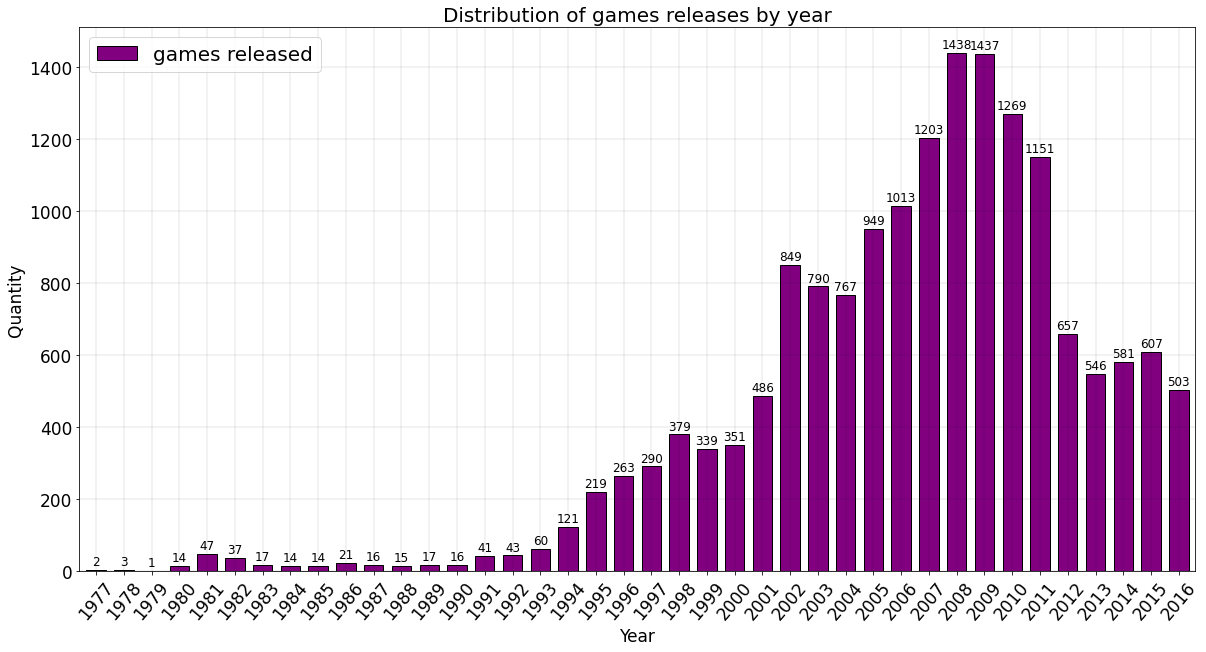

In [27]:
# построим график релизов игр по годам

releases_by_year = df.groupby('year_of_release')['name'].count().reset_index()
ax = releases_by_year.plot(x = 'year_of_release', y = 'name', kind ='bar', color = 'purple', 
             edgecolor ='black', width=0.7, label = 'games released', figsize=(20,10), tick_label = 'name')


plt.legend(fontsize = 20)
plt.title('Distribution of games releases by year', fontsize = 20)
plt.grid(linestyle='-', linewidth='0.1', color='black')
plt.ylabel('Quantity', fontsize = 17)
plt.xlabel('Year', fontsize = 17)
plt.tick_params(labelsize = 17)
plt.xticks(rotation=50)    

# добавим значения над столбцами для большей наглядности

rects = ax.patches
labels = list(releases_by_year['name'].values)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize = 12)


По графику видно, что производство игр начало активно набирать обороты с 1990 г., достигло своего пика в 2008 г., с 2009 г. резко пошло на спад. Это можно связать с экономическим кризисом 2008 г.: многие проекты замораживались, студии закрывались, производственный бюджет урезался, фокус релизов сместился на DLC (дополнения к существующим играм).

["В разгар кризиса корпорации решают сконцентрироваться на самых прибыльных брендах, а все остальные ресурсы перенаправить в сектор мобильных и онлайн-игр".](https://dtf.ru/gameindustry/65407-igrovaya-industriya-i-finansovyy-krizis-2008-goda)

### Продажи по платформам

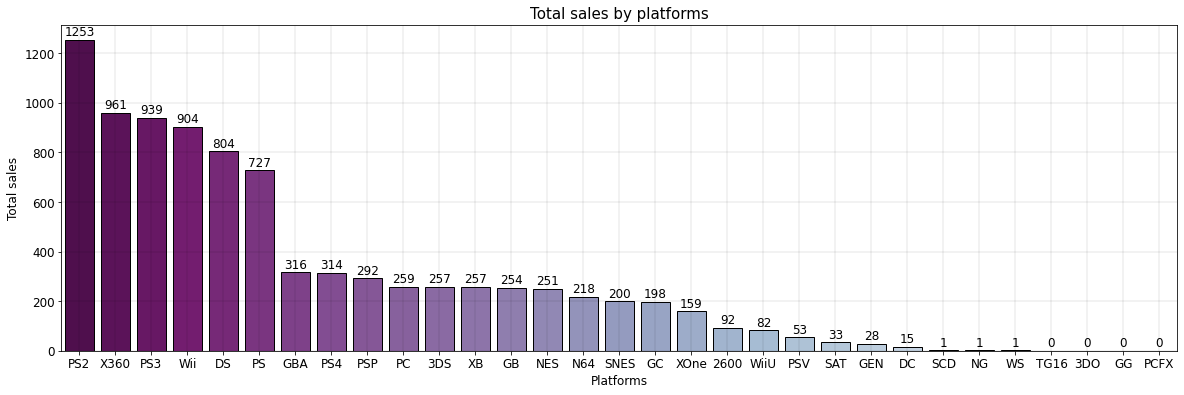

In [28]:
# построим график популярности плотформ по продажам

platform_sales = df.pivot_table(index='platform', values='total_sales', 
                                   aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(20,6))
sns.color_palette("magma", as_cmap=True)
ax = sns.barplot(x = platform_sales.index, y = platform_sales['total_sales'], palette ='BuPu_r', edgecolor ='black')

plt.title('Total sales by platforms', fontsize = 15)
plt.grid(linestyle='-', linewidth='0.1', color='black')
plt.ylabel('Total sales', fontsize = 12)
plt.xlabel('Platforms', fontsize = 12)
plt.tick_params(labelsize = 12)

rects = ax.patches
labels = list(platform_sales['total_sales'].astype('int'))

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize = 12)

На графике хорошо видны 6 платформ-лидеров: PS2, X360, PS3, Wii, DS, PS, которые более чем в 2 раза превосходят по продажам остальные.

Посмотрим на распределение продаж по годам для топ-6 популярных платформ, рассчитаем:
- медианный жизненный цикл платформ;
- медианный активный жизненный цикл платформ (тот период, в который продажи составляют более 10% от максимального числа продаж за год);
- медианный номер года существования платформы,  на который приходится пик продаж.

Медианный жизненный цикл платформ  — 10.0
Медианный активный жизненный цикл платформ  — 7.5
Медианный пик продаж наступает на  4.5 год


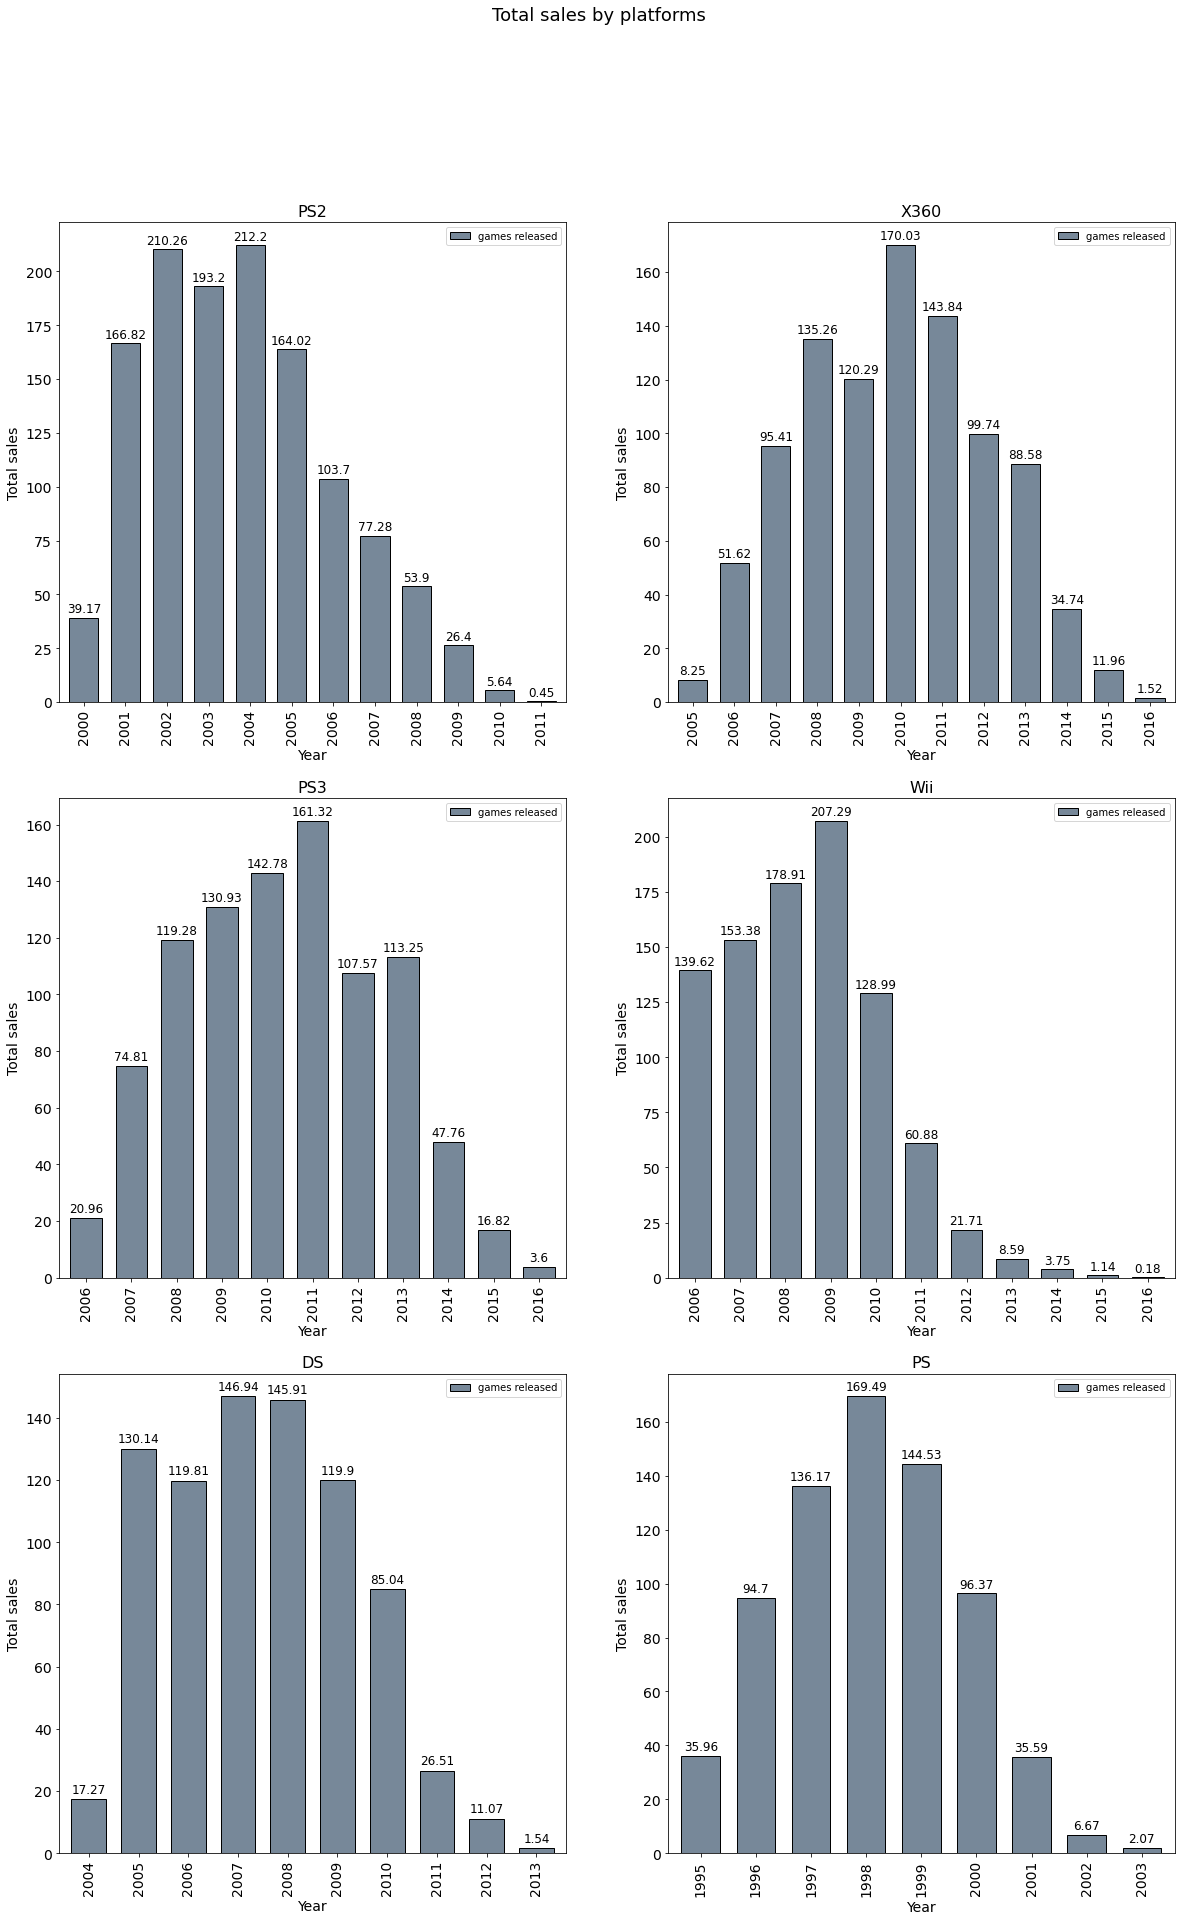

In [29]:
# создадим функцию для графиков продаж, которая будет принимать список с платформами, год отсчета, условие (нужны ли расчеты)

def sales_bar(list_of_platforms, start_year, query = None):   
    
    # создадим пустые списки для расчетов
    
    life_cycles = []
    active_life_cycles = []
    peak_of_sales = []

    fig, axes = plt.subplots(3,2, figsize = (20, 30))
    fig.suptitle ('Total sales by platforms', fontsize = 18)
    platforms = list_of_platforms
    for i, platform in enumerate(platforms):

        # строим графики
        
        sales_by_year = df.query('platform == @platform and year_of_release >= @start_year').groupby('year_of_release')['total_sales'].sum().reset_index()
        ax = sales_by_year.plot(x = 'year_of_release', y = 'total_sales', kind ='bar', color = 'lightslategray', 
                     edgecolor ='black', width=0.7, label = 'games released', ax = axes[i//2, i%2], tick_label = 'name')

        # жизненные циклы платформ
        life_cycles.append(sales_by_year['year_of_release'].max() 
                           - sales_by_year['year_of_release'].min())

        # активные жизненные циклы платформ
        active_life_cycles.append(sales_by_year.query('total_sales > total_sales.max() / 10')['year_of_release'].max() 
        - sales_by_year.query('total_sales > total_sales.max() / 10')['year_of_release'].min())

        # пик продаж
        peak_of_sales.append(sales_by_year['total_sales'].idxmax() + 1)


        ax.set_ylabel('Total sales', fontsize = 14)
        ax.set_xlabel('Year', fontsize = 14)
        ax.tick_params(labelsize = 14)
        ax.set_title(platform, fontsize = 16)
        rects = ax.patches

        labels = list(np.round(sales_by_year['total_sales'].values, 2))

        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom", fontsize = 12)


    if query != None:
        print('Медианный жизненный цикл платформ  —', stat.median(life_cycles))
        print('Медианный активный жизненный цикл платформ  —', stat.median(active_life_cycles))
        print('Медианный пик продаж наступает на ', stat.median(peak_of_sales), 'год')
        
    plt.show()
    
# почему на год меньше считает жизненные циклы?
#active_life_cycles    

top_6 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
sales_bar(top_6, 1995, query = True)


Жизненный цикл платформ, в среднем, составляет около 10 лет, активная фаза продаж длится около 7 лет, пик продаж обычно наступает на 5 год. Из топ-6 платформ быстрее всего утратила свою популярность Wii.

#### Актуальный период

Так как ситуация на рынке видеоигр стремительно меняется, чтобы не захватить уже отжившие тренды, для прогноза на 2017 г. возьмем актуальный период с 2013 по 2016 гг.

Посмотрим на продажи платформ за актуальный период:

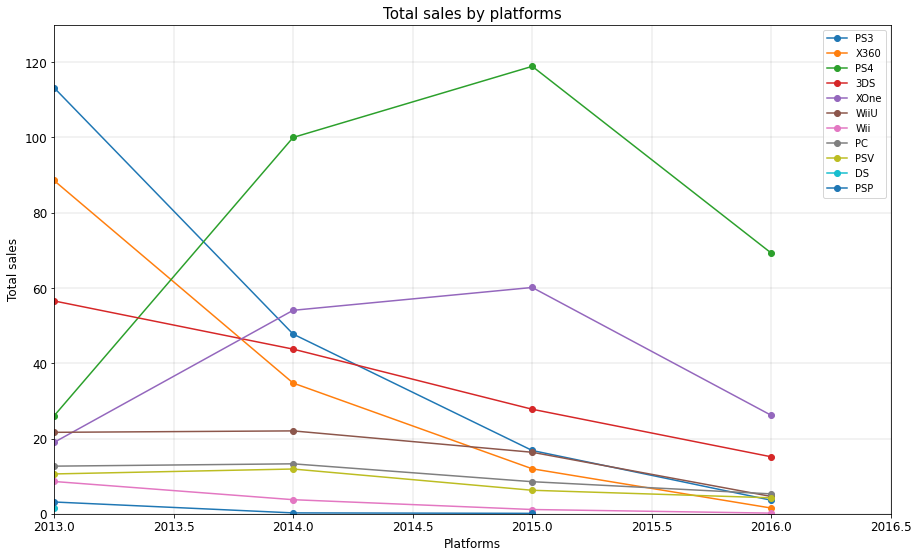

In [30]:
plt.figure(figsize=(15,9))
ax = plt.gca()
platforms = df.query('year_of_release > 2012')['platform'].unique().tolist()

for platform in platforms:   
    sales_by_year = df.query('platform == @platform').groupby('year_of_release')['total_sales'].sum().reset_index()

    sales_by_year.plot(x = 'year_of_release', y = 'total_sales',
                       ax=ax, label = platform, style='o-', xlim = 2013)

ax.set_ylim([0,130])    
plt.title('Total sales by platforms', fontsize = 15)
plt.grid(linestyle='-', linewidth='0.1', color='black')
plt.ylabel('Total sales', fontsize = 12)
plt.xlabel('Platforms', fontsize = 12)
plt.tick_params(labelsize = 12)

plt.show()

Теперь изучим детальнее 6 лидеров по продажам за актуальный период:

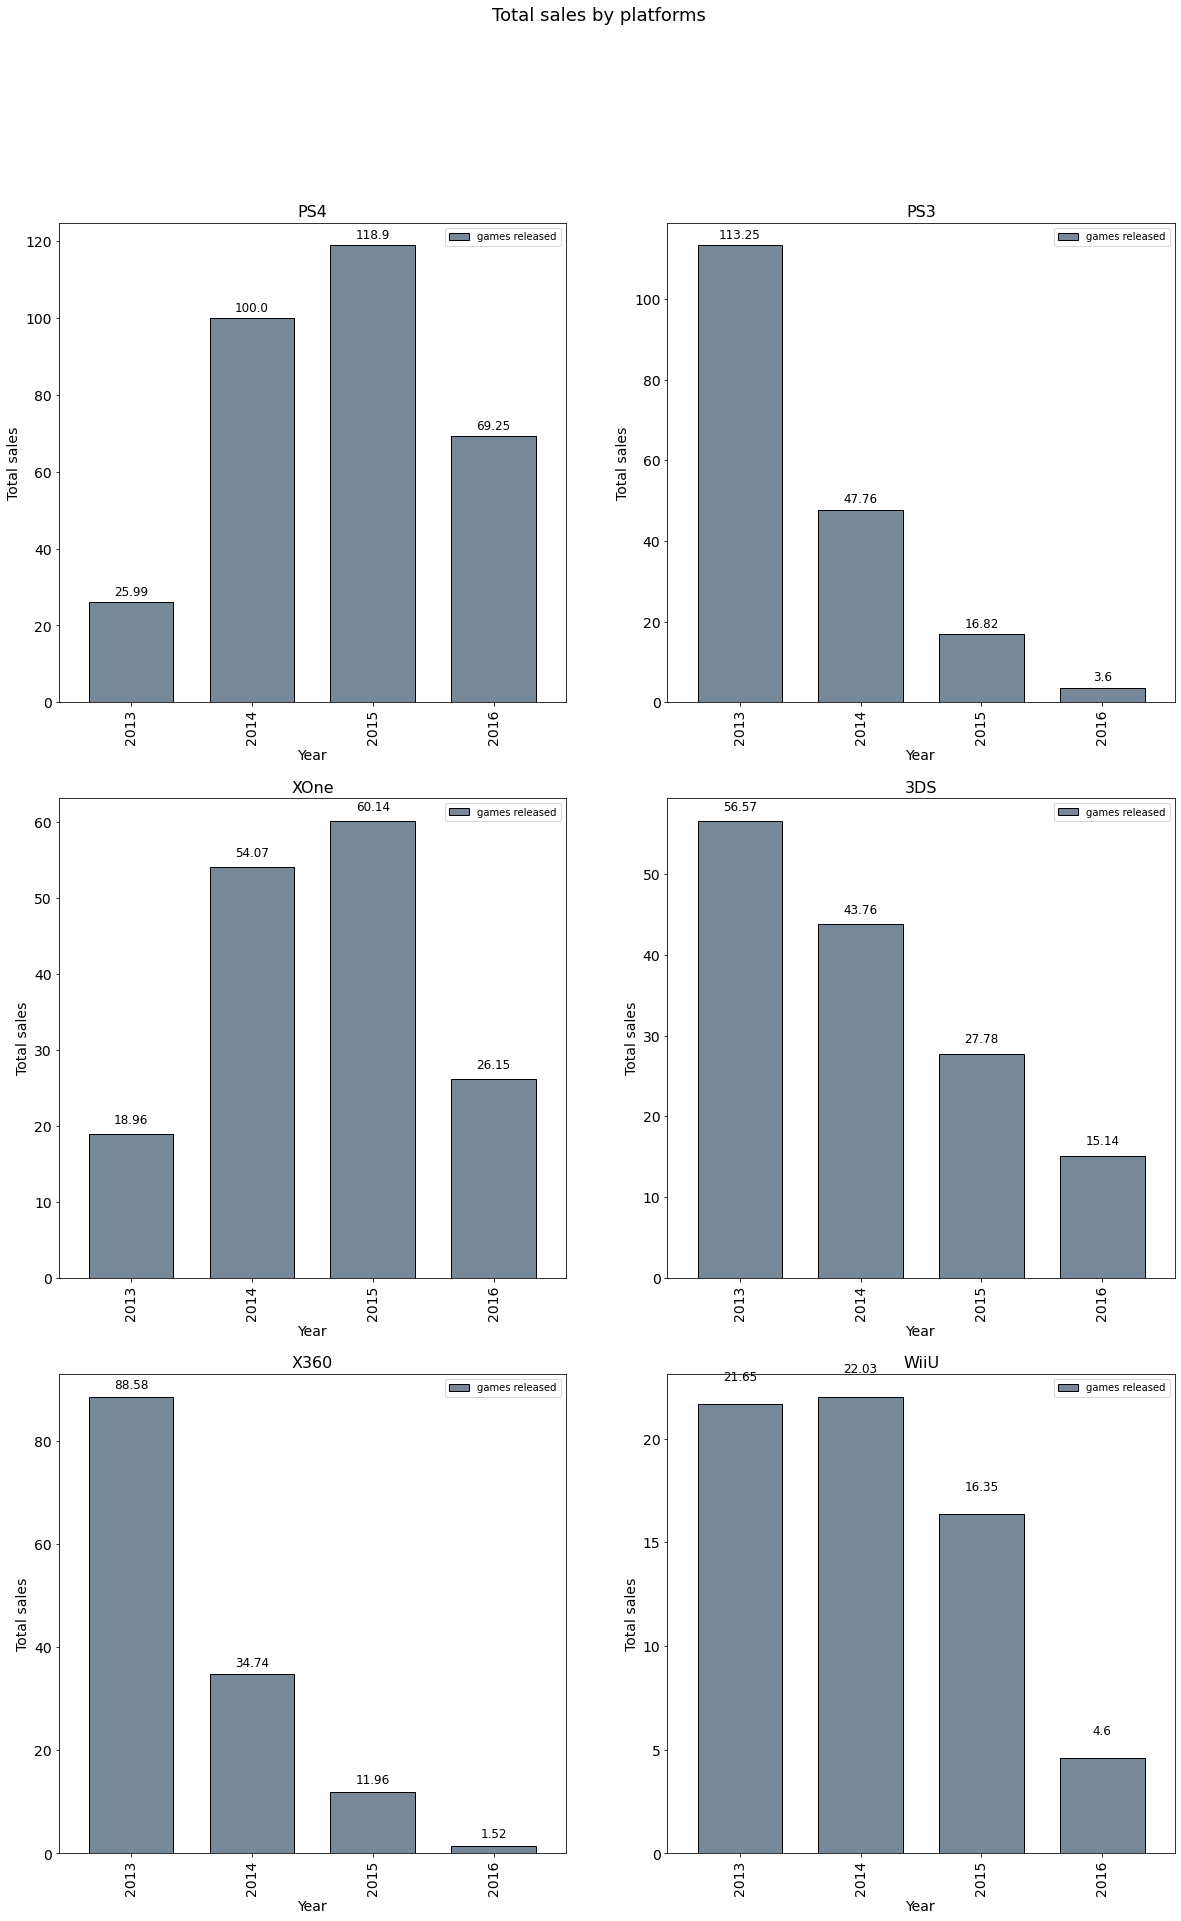

In [31]:
sales_by_year = df.query('year_of_release > 2012').groupby('platform')['total_sales'].sum().reset_index()
sales_by_year = sales_by_year.sort_values(by = 'total_sales', ascending=False).reset_index(drop = True)
new_top_6 = list(sales_by_year.loc[:5, ['platform']]['platform'])

sales_bar(new_top_6, 2013, query = None)

Мы видим, что в актульный период перестали пользоваться спросом игры платформ DS и PSP. 2015 г. стал пиковым по продажам для платформ PS4 и XOne. К 2016 г. продажи по всем платформам идут на спад. 

Лидеры продаж на 2016 г.:

- PlayStation 4 (PS4)
- Xbox One (XOne)
- Nintendo 3DS (3DS)

Самой продаваемой платформой стала PS4, продажи по которой в 2,5 раза превышают продажи следующей за ней платформы - XOne на 2016 г.

#### Ящик с усами

Построим графики "ящик с усами" в разных масштабах по проддажам игр за актуальный период: 

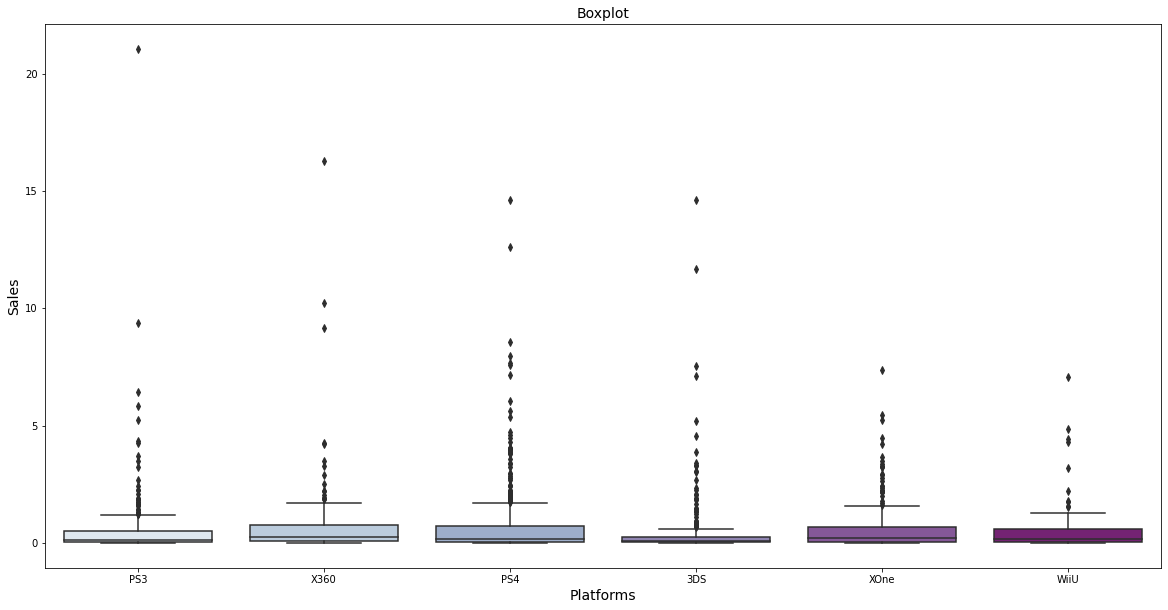

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df.query('platform.isin(@new_top_6) & year_of_release > 2012'), x ='platform', y='total_sales', palette="BuPu")
plt.title('Boxplot', fontsize=14)
plt.xlabel('Platforms', fontsize=14)
plt.ylabel('Sales',fontsize=14)
ax = plt.gca()


(0.0, 2.0)

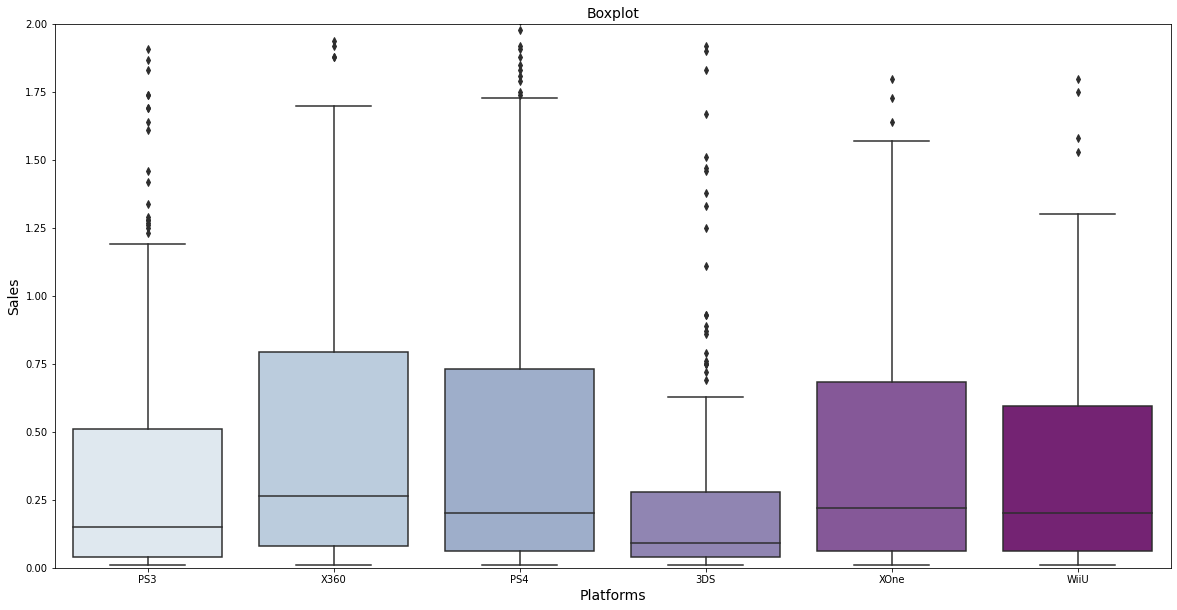

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df.query('platform.isin(@new_top_6) & year_of_release > 2012'), x ='platform', y='total_sales', palette="BuPu")
plt.title('Boxplot', fontsize=14)
plt.xlabel('Platforms', fontsize=14)
plt.ylabel('Sales',fontsize=14)
ax = plt.gca()
ax.set_ylim([0,2])

Медианное количество проданных копий игры на платформах PS4, XOne и WiiU практически одинаковая - примерно, 200 000 копий, при этом самый большой верхний квартиль у PS4, что говорит нам о том, что игры на этой платформе - самые популярные из топ 6 платформ за актуальный период. Судя по выбросам, XOne и WiiU - более стабильные платформы. Платформа 3DS, хоть и менее популярна, но некоторые игры на ней превышают по количеству проданных копий самые популярные игры на XOne и WiiU. 75% игр на PC лежат в пределах 625 000 проданных копий за актуальный период.

### Влияние отзывов на продажи игр

Посмотрим, как влияют на продажи игр на PS4 отзывы пользователей и критиков, а также корреляцию данных параметров в рамках топ-6 популярных платформ:

0it [00:00, ?it/s]

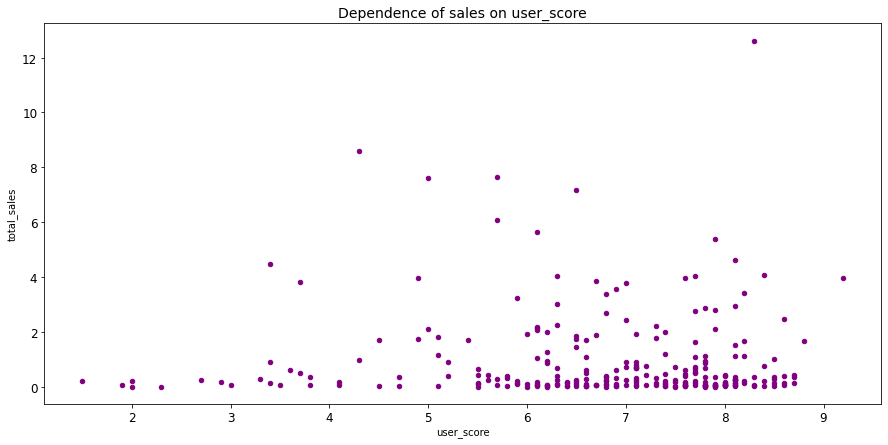

1it [00:00,  6.15it/s]

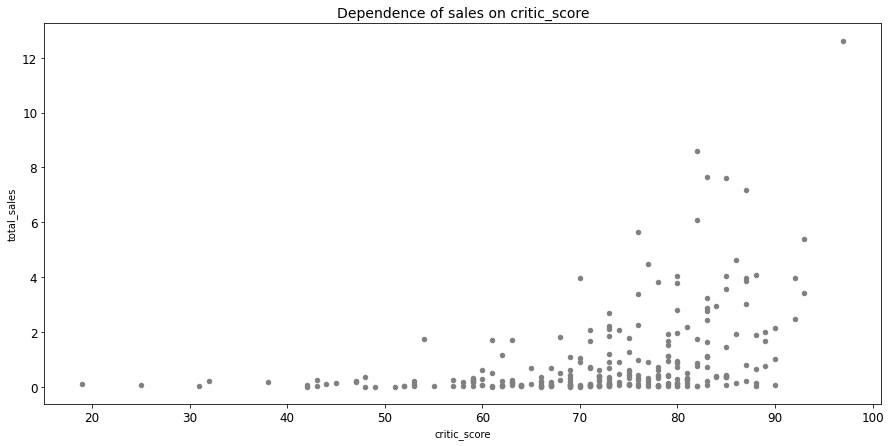

2it [00:00,  4.50it/s]


,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


,total_sales,user_score,critic_score
total_sales,1.000000,0.125776,0.398228
user_score,0.125776,1.000000,0.620182
critic_score,0.398228,0.620182,1.000000


In [34]:
colors = ['purple', 'gray']

for scores, color in tqdm(zip(['user_score', 'critic_score'], colors)):

    plt.figure(figsize = (15,7))
    ax = plt.gca()
    df.query('platform == "PS4" & year_of_release > 2012').plot(x = scores, y='total_sales', kind='scatter', ax = ax, color = color)
    plt.title(f'Dependence of sales on {scores}', fontsize=14)
    plt.tick_params(labelsize = 12)


    plt.show()
    
display(df.query('platform == "PS4" & year_of_release > 2012')[['total_sales', 'user_score', 'critic_score']].corr())
df.query('platform.isin(@new_top_6) and platform != "PS4"')[['total_sales', 'user_score', 'critic_score']].corr()

Между отзывами критиков и количеством продаж игр на платформе PS4 есть слабая положительная зависимость, количество продаж не коррелируют с оценками пользователей. Если рассматривать топ-6 платформ, то оценки имеют очень слабую положительную взаимосвязь.

### Распределение игр по жанрам

0it [00:00, ?it/s]

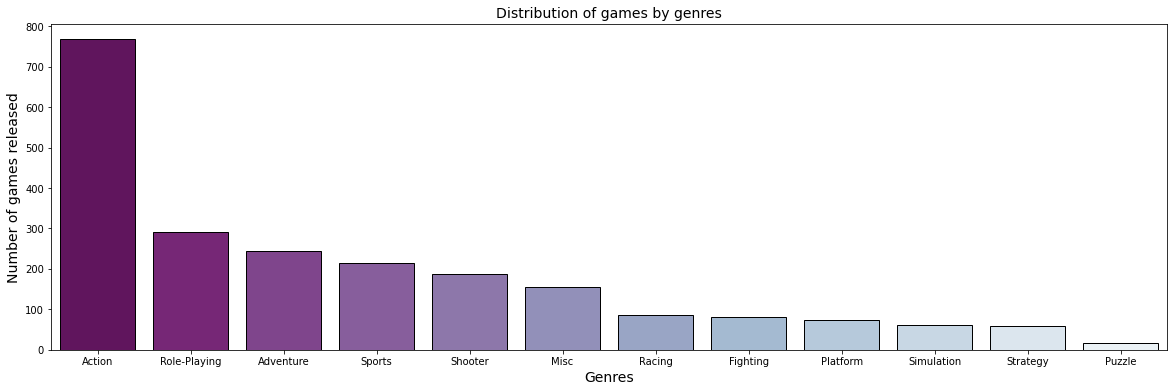

1it [00:00,  4.67it/s]

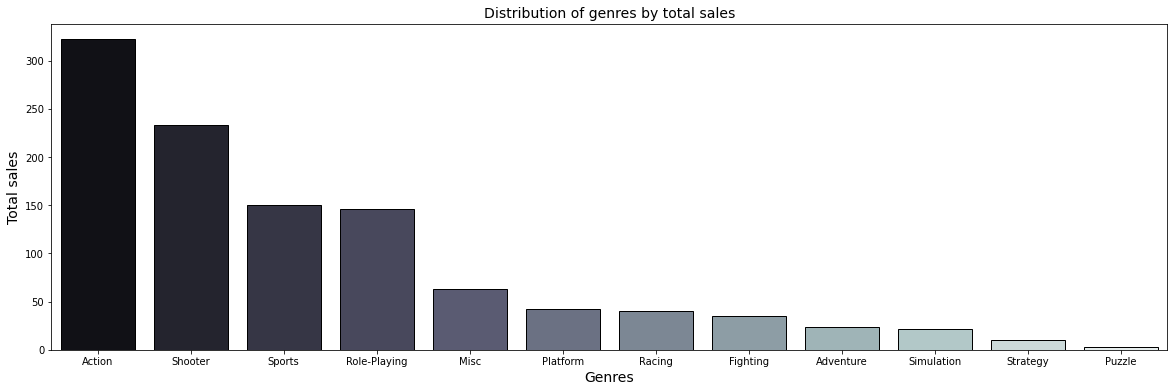

2it [00:00,  4.74it/s]


In [35]:
for param, func, palette in tqdm(zip(['name', 'total_sales'], ['count', 'sum'], ['BuPu_r','bone'])):

    sort_df = df.query('year_of_release > 2012').pivot_table(index='genre', values = param, 
                                       aggfunc = func).sort_values(by = param, ascending = False)
    if param == 'name':
        genres_produced = sort_df
    else:
        genres_sales = sort_df

    plt.figure(figsize=(20,6))
    sns.color_palette("magma", as_cmap=True)
    sns.barplot(x = sort_df.index, y = sort_df[param], palette = palette, edgecolor ='black')
    
    if param == 'name':
        plt.title('Distribution of games by genres', fontsize=14)
        plt.xlabel('Genres', fontsize=14)
        plt.ylabel('Number of games released',fontsize=14)
    else:
        plt.title('Distribution of genres by total sales', fontsize=14)
        plt.xlabel('Genres', fontsize=14)
        plt.ylabel('Total sales',fontsize=14)
        
    plt.show()

Для того, чтобы понять, какие жанры самые прибыльные, посмотрим, сколько приходится проданных игр на одну, произведенную в определенном жанре:

Text(0, 0.5, 'Ratio')

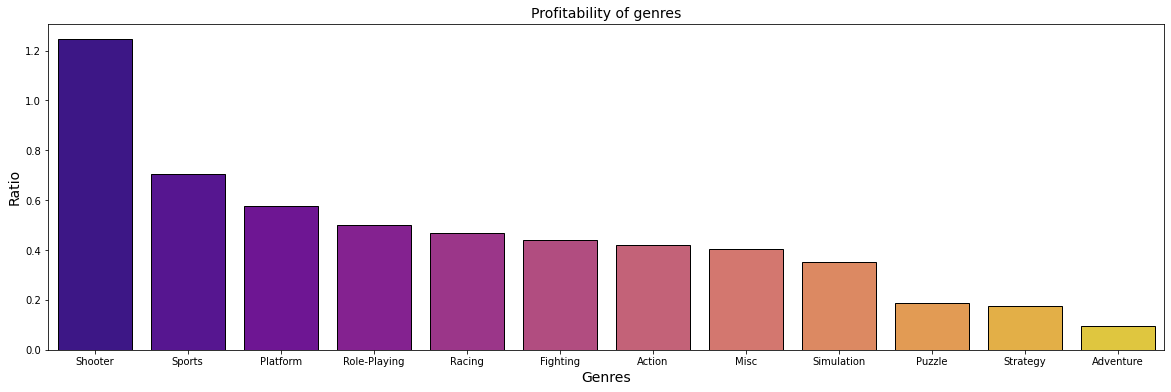

In [36]:
genres_info = genres_sales.merge(genres_produced, on='genre', how='left')
genres_info['sold_div_by_released'] = genres_info['total_sales'] / genres_info['name']
genres_info = genres_info.sort_values(by = 'sold_div_by_released', ascending=False).reset_index()

plt.figure(figsize=(20,6))
sns.barplot(x = genres_info['genre'], y = genres_info['sold_div_by_released'], palette = 'plasma', edgecolor ='black')
plt.title('Profitability of genres', fontsize=14)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Ratio',fontsize=14)

Несмотря на то, что больше всего игр производится и продается в жанре Action, он занимает 7 место по прибыльности. Самым прибыльным жанром является Shooter, далее следуют Sorts и Platform. Наименее прибыльные - Puzzle, Strategy и Adventure.

### Вывод


1. Производство игр активно начинает расти с 90х годов, достигая своего пика в 2008 г. (почти 1,5 тысячи игр за год), но случается экономический кризис, и количество релизов в год снижается до 500-600.
2. Топ-6 популярных платформ за весь период: PS2, X360, PS3, Wii, DS, PS. Главный лидер - PS2, продажи игр этой платформы составили более миллиарда проданных копий.
3. Медианный жизненный цикл топ-6 платформ за все время - составляет 10 лет, пик продаж наступает примерно на 4-5 года.
4. Топ-5 платформ, вышедшие за актуальный период (с 2009 г.): PS4, 3DS, XOne, WiiU, PSV. Главный лидер - также PS, 4ая модель. Нам еще не известно, когда устареют данные платформы, но можем предположить, что они утратят популярность быстрее, чем это происходило с платформами ранее, так как их пик продаж наступает примернона 3 год.
5. Отзывы практически не коррелируют с продажами игр, однако, пользователи больше доверяют оценкам критиков.
6. Наиболее прибыльным жанром в актуальный период является Shooter.  

## Портреты пользователей каждого региона

#### Топ-5 популярных платформ

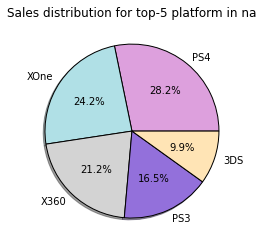

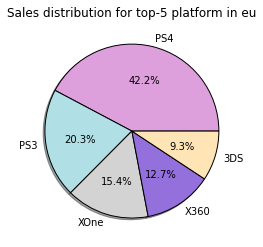

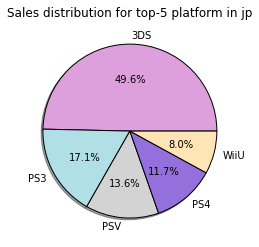

In [37]:
def pie_for_regions(param):
    for region in ['na', 'eu', 'jp']:
    
        region_pivot = df.query('year_of_release > 2012').pivot_table(index= param, values = f'{region}_sales', 
                                      aggfunc='sum').sort_values(by = f'{region}_sales', ascending = False).iloc[:5]

        values = region_pivot[f'{region}_sales'].values.tolist()
        labels = region_pivot.index

        fig, ax = plt.subplots()
        ax.pie(values, labels=labels, autopct='%1.1f%%', 
                   wedgeprops = {'lw':1, 'ls':'-','edgecolor':'black'}, shadow = True, 
                   colors = ['plum', 'powderblue', 'lightgrey', 'mediumpurple', 'moccasin'])
        plt.title(f'Sales distribution for top-5 {param} in {region}')    

    plt.show()
    
pie_for_regions('platform')

Самые продаваемые игры в Северной Америке выходят на платформах PS4, XOne и X360.
В Европе любимые платформы - PS4 и PS3, чуть меньше игр продаются на  XOne, X360 и 3DS.
В Японии больше всего уважают свою же платформу DS, половина продающихся там игр выходят на этой платформе. 

#### Топ-5 популярных жанров

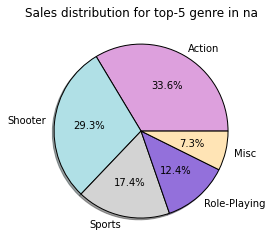

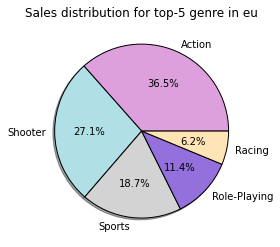

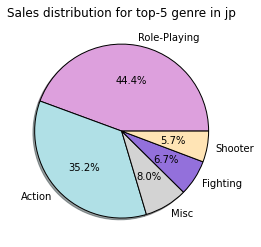

In [38]:
pie_for_regions('genre')

Если говорить о топ-4 популярных жанрах, то вкусы американцев совпадают со вкусами европейцев: любимый жанр - action, далее следуют shooter, sporst и role-playing. У японцев же сильно выбивается по популярности жанр role-playing (44 % от всех продаж). На втором месте - action (35 % от всех продаж).

#### Рейтинг ESRB и продажи 

Прежде, чем посмотреть на медианные продажи по возрастным категориям ESRB, нужно посмотреть, равнозначны ли выборки:

In [39]:
df.query('year_of_release > 2012').pivot_table(index='rating_description', values = 'name', 
                                  aggfunc='count')

,name
rating_description,
10+,253
13+,333
17+,371
для всех,302
на рассмотрении,1
отсутствует,977


Интересующие нас выборки равнозначны.

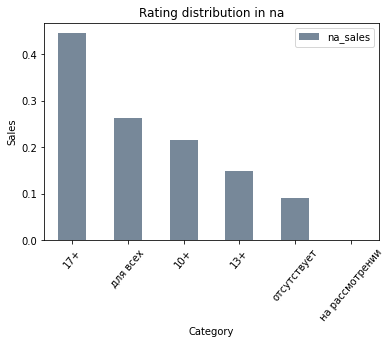

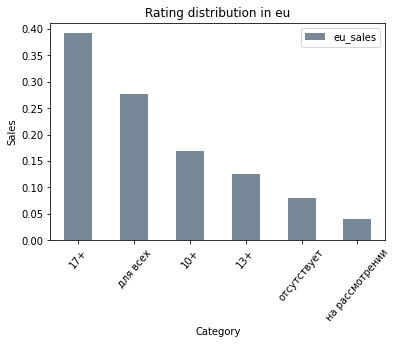

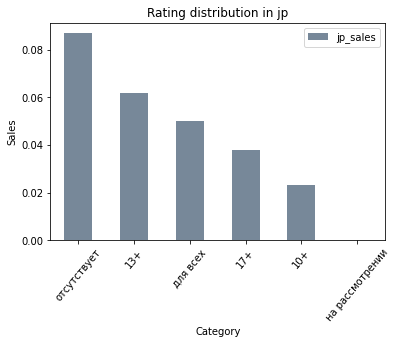

In [40]:
for region in ['na', 'eu', 'jp']:

    region_pivot = df.query('year_of_release > 2012').pivot_table(index='rating_description', values = f'{region}_sales', 
                                  aggfunc='mean').sort_values(by = f'{region}_sales', ascending = False)
    
    region_pivot.plot(kind = 'bar', color = 'lightslategray')
    plt.title(f'Rating distribution in {region}')    
    plt.xlabel('Category')
    plt.ylabel('Sales')
    plt.xticks(rotation=50)    

    plt.show()

И у американцев, и у европейцев прослеживается тенденция - чем выше возрастной рейтинг, тем выше средние продажи игр. Если говорить про продажи в Японии, то у игр с наибольшими продажами возрастные категории не указаны в нашем датафрейме. Мы можем только сказать, что самые популярные игры с указанным рейтингом в нашей выборке - игры 13+, за ними следуют игры 17 и 10+.

### Вывод

**Северная Америка:**
- любимые платформы: PS4 и XOne;
- любимые жанры: action и shooter;
- чаще всего берут игры с возрастной категорией 17+.

**Европа:**
- любимые платформы: PS4 и PS3;
- любимые жанры: action и shooter;
- чаще всего берут игры с возрастной категорией 17+.

**Япония:**
- любимая платформа - 3DS;
- любимые жанр - role-playing;
- чаще всего берут игры с возрастной категорией 13+.

## Проверка гипотез

### Гипотеза №1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем основную и альтернативную гипотезы:
- H₀ - Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.
- H₁ - Средние пользовательские рейтинги платформ Xbox One и PC **различаются**.

Прежде, чем приступать к проверке, посмотрим на размеры выборок:

In [41]:
XOne_sample = df.query('platform == "XOne" & user_score > 0 & year_of_release > 2012')['user_score'].tolist()
PC_sample = df.query('platform == "PC" & user_score > 0 & year_of_release > 2012')['user_score'].tolist()
print(len(XOne_sample), len(PC_sample))

182 159


и распределения:

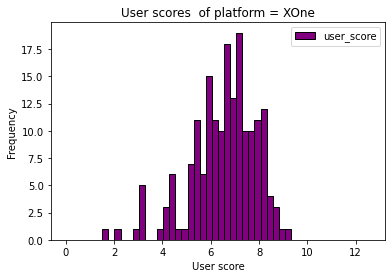

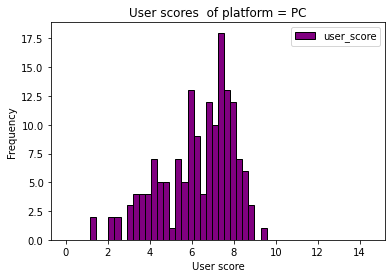

In [42]:
def hist(column, criterions):
    for criterion in (criterions):
        
        new_df = df.query(f'{column} == "{criterion}" & user_score > 0 & year_of_release > 2012')

        # определим первый и третий квантиль и размах
        q1 = new_df[['user_score']].quantile(.25)['user_score']
        q3 = new_df[['user_score']].quantile(.75)['user_score']

        # зададим интерквартильный интервал
        iqr = q3 - q1

        new_df.plot(y = 'user_score', kind = 'hist', bins = 50, color = 'purple', 
                      edgecolor = 'black',range = (df['user_score'].min(), q3+3*iqr))

        plt.xlabel('User score')
        plt.title(f'User scores  of {column} = {criterion}')
        plt.show()
    
hist('platform',['XOne', 'PC'])

Каждая выборка больше 30, они независимы, распределения близки к нормальному, проверим их равнозначность:

In [43]:
print('Дисперсия выборки по платформе XOne =', np.var(XOne_sample), 
      '\nДисперсия выборки по платформе PC =', np.var(PC_sample))

if np.var(XOne_sample) > np.var(PC_sample):
    print('Дисперсия выборки по платформе XOne больше дисперсии по выборке PC в {}'.
          format(round(np.var(XOne_sample) / np.var(PC_sample), 2)) + ' разa')
else:
    print('Дисперсия выборки по платформе PC больше дисперсии по выборке XOne в {}'.
          format(round(np.var(PC_sample) / np.var(XOne_sample), 2)) + 'разa')

Дисперсия выборки по платформе XOne = 1.8965188383045526 
Дисперсия выборки по платформе PC = 3.003088485423836
Дисперсия выборки по платформе PC больше дисперсии по выборке XOne в 1.58разa


Проведем t-test, в `equal_var` передадим False, так как дисперсии различаются: 

In [44]:
alpha = 0.01

results = st.ttest_ind(XOne_sample, PC_sample, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13321068392133945
Не получилось отвергнуть нулевую гипотезу


### Вывод

Гипотеза №1 подтвердилась, мы не можем утверждать, что пользовательские рейтинги платформ Xbox One и PC разные.

### Гипотеза №2: средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем основную и альтернативную гипотезы:
- H₀ - Средние пользовательские рейтинги жанров Action и Sports **разные**.
- H₁ - Средние пользовательские рейтинги жанров Action и Sports **одинаковые**.

Прежде, чем приступать к проверке, посмотрим на размеры выборок:

In [45]:
action_sample = df.query('genre == "Action" & user_score > 0 & year_of_release > 2012')['user_score'].tolist()
sports_sample = df.query('genre == "Sports" & user_score > 0 & year_of_release > 2012')['user_score'].tolist()

print(len(action_sample), len(sports_sample))

391 160


и распределения:

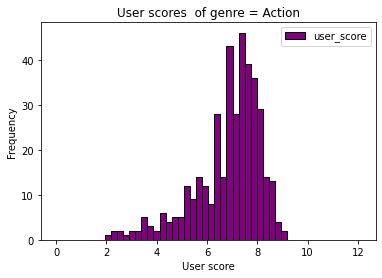

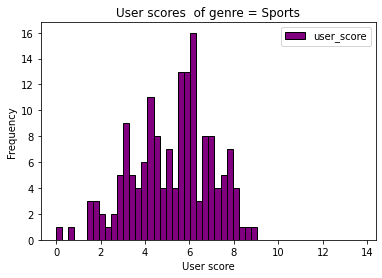

In [46]:
hist('genre',['Action', 'Sports'])

Каждая выборка больше 30, они независимы, распределения близки к нормальному, проверим их равнозначность:

In [47]:
print('Дисперсия выборки по жанру action =', np.var(action_sample), 
      '\nДисперсия выборки по жанру sports =', np.var(sports_sample))

if np.var(action_sample) > np.var(sports_sample):
    print('Дисперсия выборки по жанру Action больше дисперсии по выборке Sports в {}'.
          format(round(np.var(action_sample) / np.var(sports_sample), 2)) + ' разa')
else:
    print('Дисперсия выборки по жанру Sports больше дисперсии по выборке Action в {}'.
          format(round(np.var(sports_sample) / np.var(action_sample), 2)) + 'разa')

Дисперсия выборки по жанру action = 1.7593549231101315 
Дисперсия выборки по жанру sports = 3.160733984375
Дисперсия выборки по жанру Sports больше дисперсии по выборке Action в 1.8разa


Проведем t-test, в `equal_var` передадим  False, так как дисперсии различаются: 

In [48]:
alpha = 0.01

results = st.ttest_ind(action_sample, sports_sample, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6948835429264077e-20
Отвергаем нулевую гипотезу


### Вывод

Гипотеза №2 не подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

## Вывод

Мы проанализировали исторические данные о играх и их продажах, собранные из открытых источников, за 1980-2006 гг.

Данные нам достались в хорошем состоянии, поэтому этап предобработки в большей степени был посвящен не исправлению ошибок, а заполнению пропусков, которые в основном произошли в результате парсинга открытых источников, часть данных не подгрузилась по тем, или иным причинам. Нам удалось избавиться от всех пропусков, за исключением столбцов `critic_score`, `user_score`, `rating`. Отсутсиве данных в этих столбцах можно объяснить тем, что до 1996 г. не было ресурсов, где можно было оценивать видео игры, также сама организация ESRB появилась только в 1994 г. Более того, не у всех игр аудитория проявляет активность в выставлении оценок.

На этапе исследования мы приняли решение считать актуальным периодом с 2009 г., так как это посткризисное время, когда производства сокращаются и выживают только сильнейшие. Мы выбрали топ-6 платформ за актуальный период: PS4, 3DS, PC, XOne, WiiU, PSV, явным лидером среди которых является PS4, игр которой было ппродано почти 120 млн. копий за 2015 г. В 2016 г. продажи упали до 70 млн. копий, что более, чем в 2 раза превышает продажи Xbox One, вышедшей в том же году (две самые последние платформы, вышедшие за актуальный период).

Также мы выяснили, что отзывы не особо влияют на продажи игры, однако, есть небольшая линейная зависимость продаж игр от отзываов критиков: чем выше рейтинг - тем больше доверие.

Самый прибыльный жанр среди игроков - shooter.

Проверив 2 гипотезы и выяснили, что:
- Гипотеза №1 подтвердилась, мы не можем утверждать, что пользовательские рейтинги платформ Xbox One и PC разные.
- Гипотеза №2 не подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


**Таким образом, интернет-магазину "Стримчик" в его рекламных кампаниях на 2017 стоит сделать больший акцент на играх платформыы PS4, в жанре shooter, преимущественно с высокими оценками критиков.**